In [1]:
try:
    # try if in colab
    import google.colab

    from scripts.colab import setup_colab

    setup_colab()
except ImportError:
    pass

from pathlib import Path

import chromhandler as ch
import pandas as pd

In [2]:
# load molecules in
adenine = ch.Molecule.read_json("data/molecules/adenine.json")
adenosine = ch.Molecule.read_json("data/molecules/adenosine.json")

# load initial conditions
inits = pd.read_csv("data/hplc/init_conditions.csv").set_index("sample_id")
inits

,adenosine,adenine,SAHH
sample_id,,,
CF6,300,0,0.08125
CF7,125,0,0.08125
CF8,100,0,0.08125
CF9,75,0,0.08125
CF10,50,0,0.08125


Loaded 7 chromatograms.


              🎯 Peak Assignment Summary of CF6              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (4/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF6


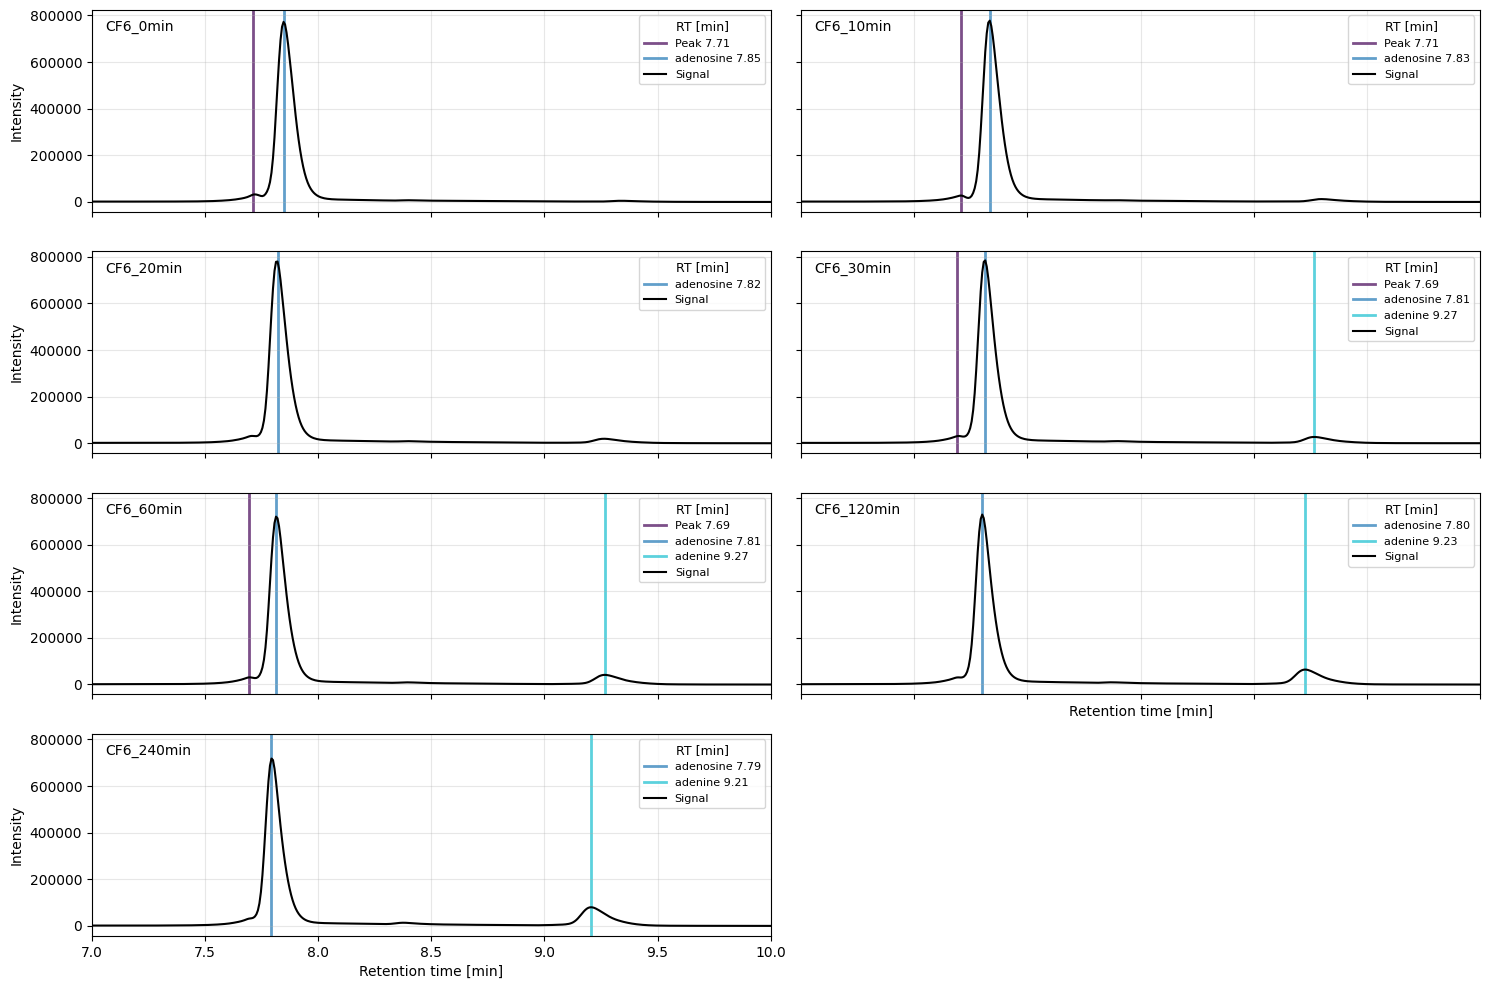

Loaded 7 chromatograms.


              🎯 Peak Assignment Summary of CF8              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (6/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF8


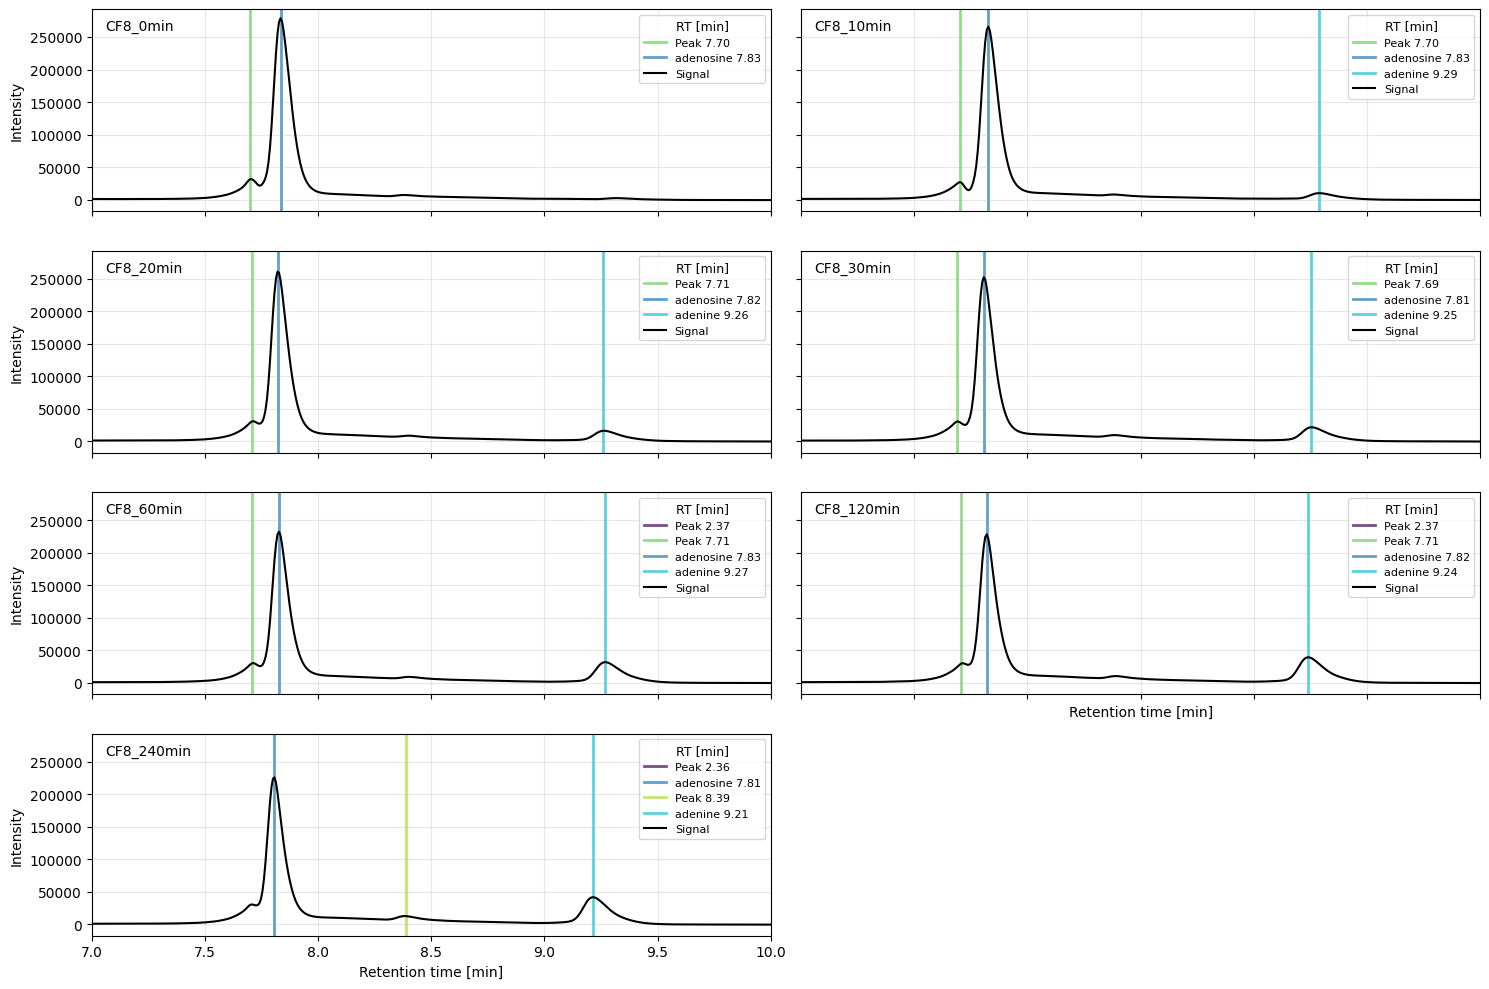

Loaded 7 chromatograms.


              🎯 Peak Assignment Summary of CF9              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (6/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF9


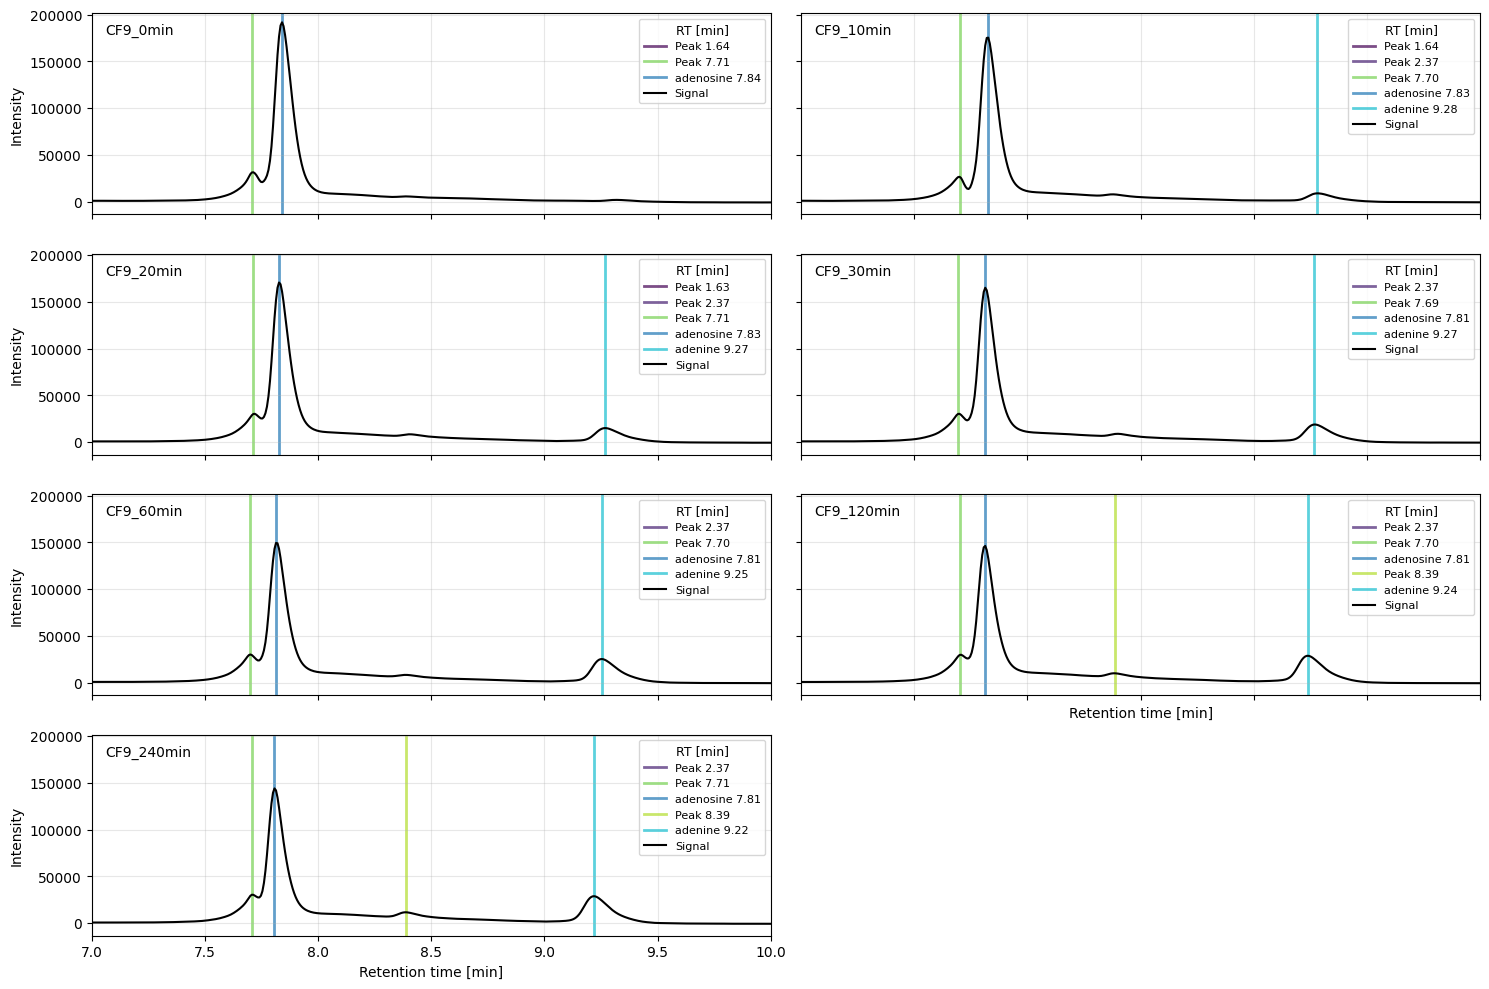

Loaded 7 chromatograms.


              🎯 Peak Assignment Summary of CF7              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (6/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF7


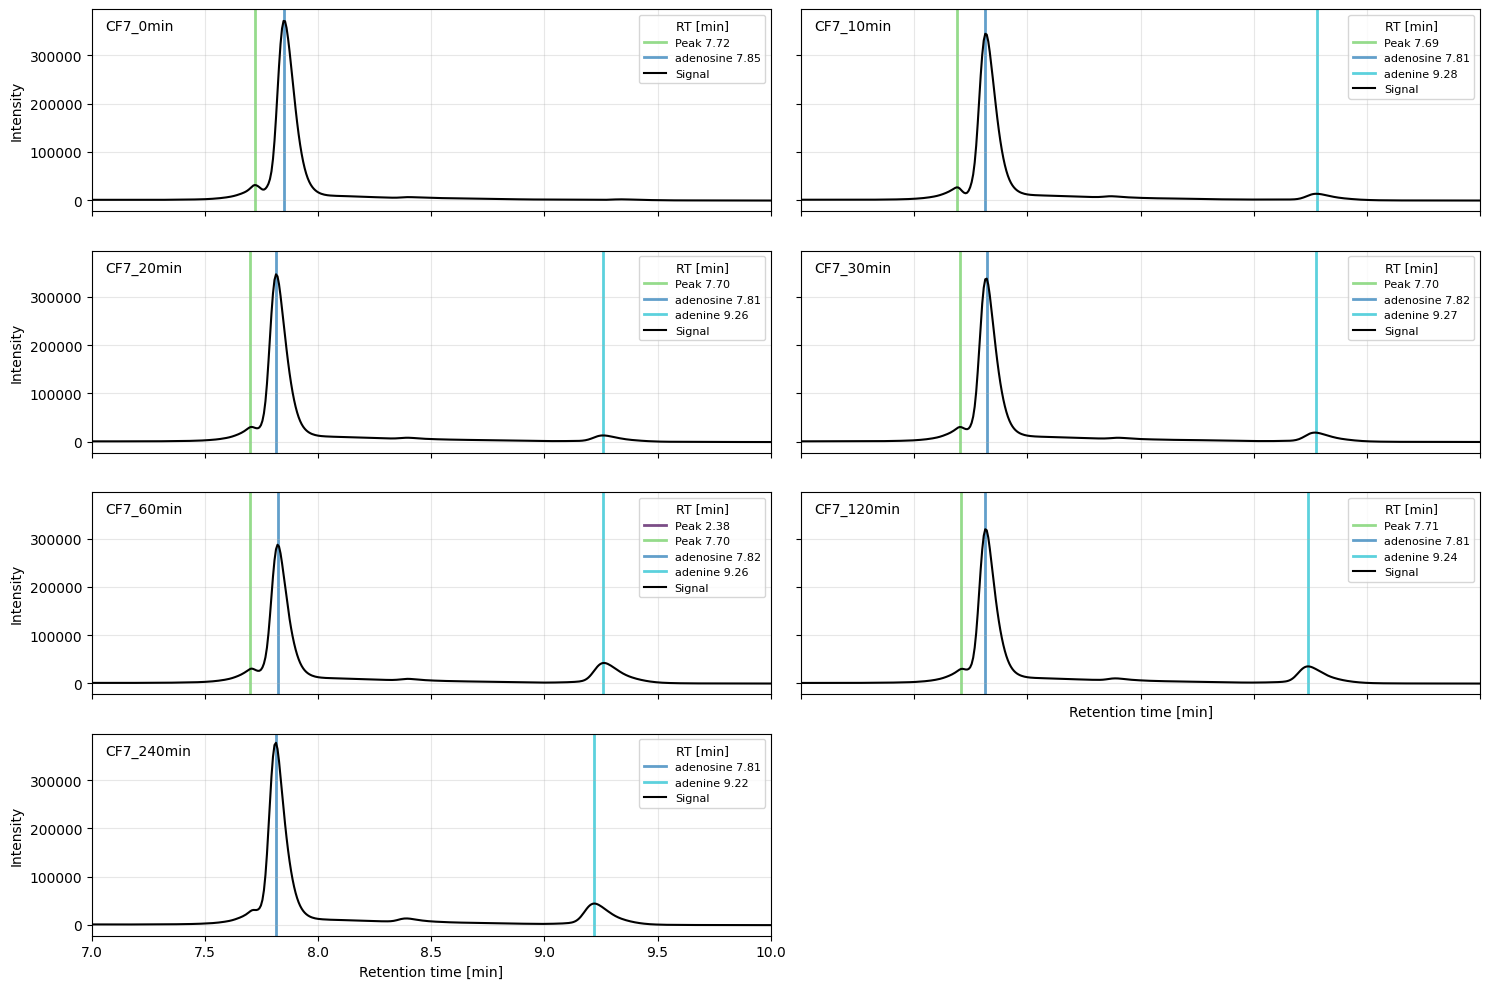

Loaded 7 chromatograms.


             🎯 Peak Assignment Summary of CF10              
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Molecule              ┃   Status   ┃ Details              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ adenine (adenine)     │ 🟡 Partial │ (6/7) peaks assigned │
│ adenosine (adenosine) │ ✅ Success │ (7/7) peaks assigned │
└───────────────────────┴────────────┴──────────────────────┘

Loaded data/hplc/kinetics/CF10


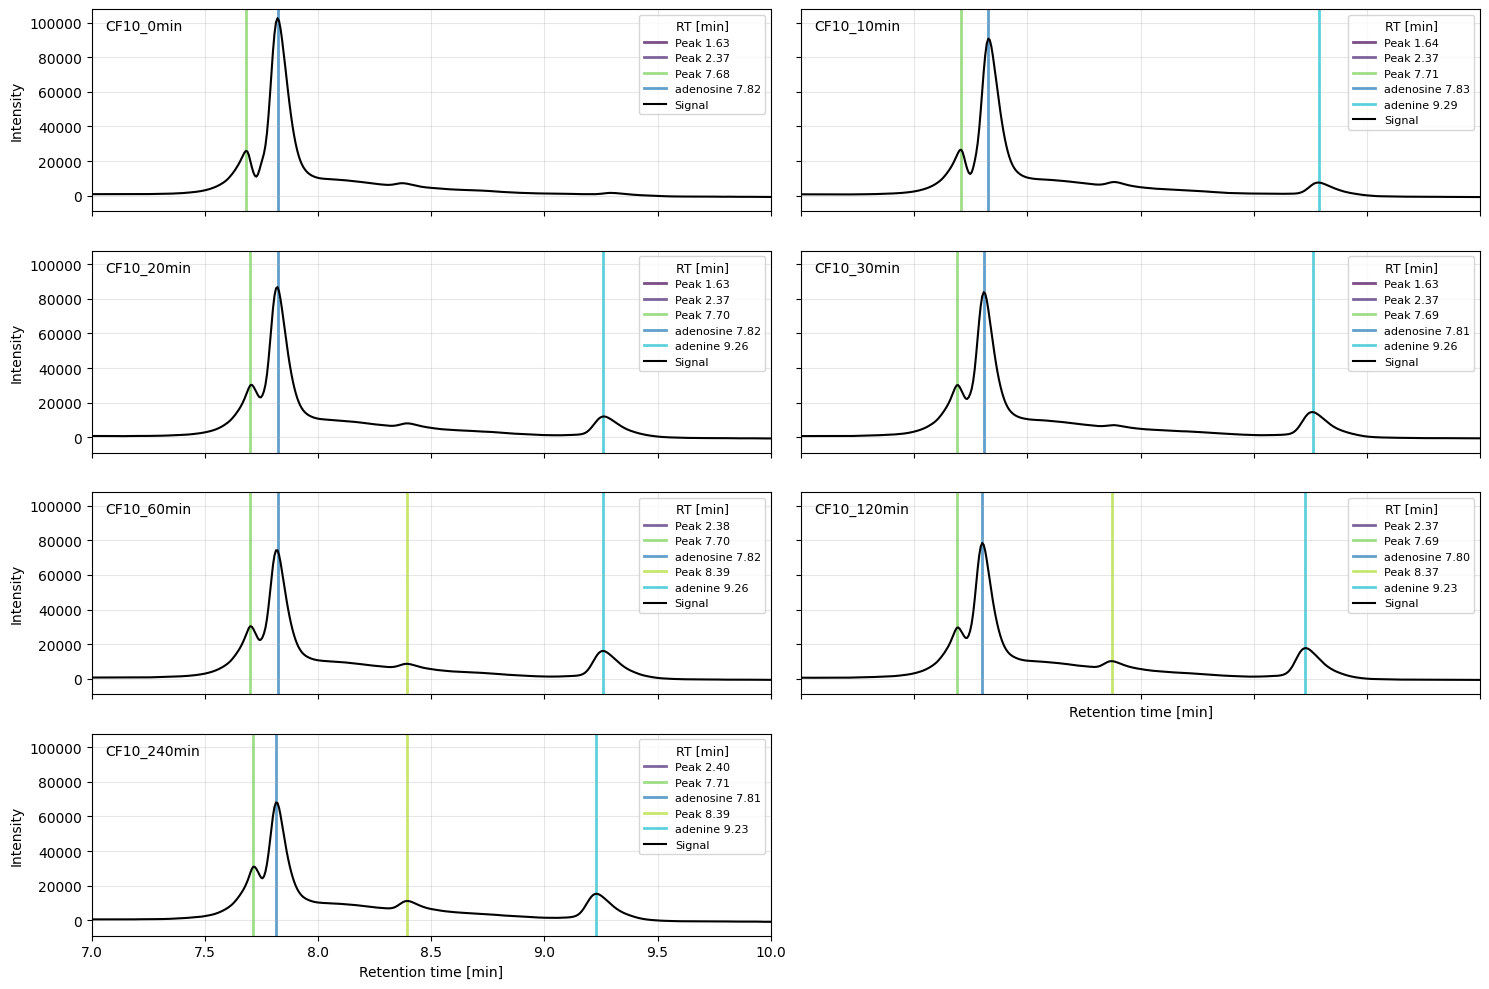

In [3]:
kinetic_dir = Path("data/hplc/kinetics")

ph = 7.4
temp = 37
temp_unit = "deg_C"

# iterate over kinetic data
handlers = []
for sample_dir in kinetic_dir.iterdir():
    handler = ch.Handler.read_asm(
        path=sample_dir,
        ph=ph,
        temperature=temp,
        temperature_unit=temp_unit,
        mode="timecourse",
    )

    # add molecules to handler
    handler.add_molecule(adenine, inits.loc[sample_dir.name, "adenine"])
    handler.add_molecule(adenosine, inits.loc[sample_dir.name, "adenosine"])

    # assign peaks
    handler.assign_all_peaks()

    print(f"Loaded {sample_dir}")
    handler.visualize(rt_min=7, rt_max=10)
    handlers.append(handler)

In [4]:
enzmldoc = ch.to_enzymeml(
    document_name="kinetic",
    handlers=handlers,
    calculate_concentration=True,
    extrapolate=True,
)

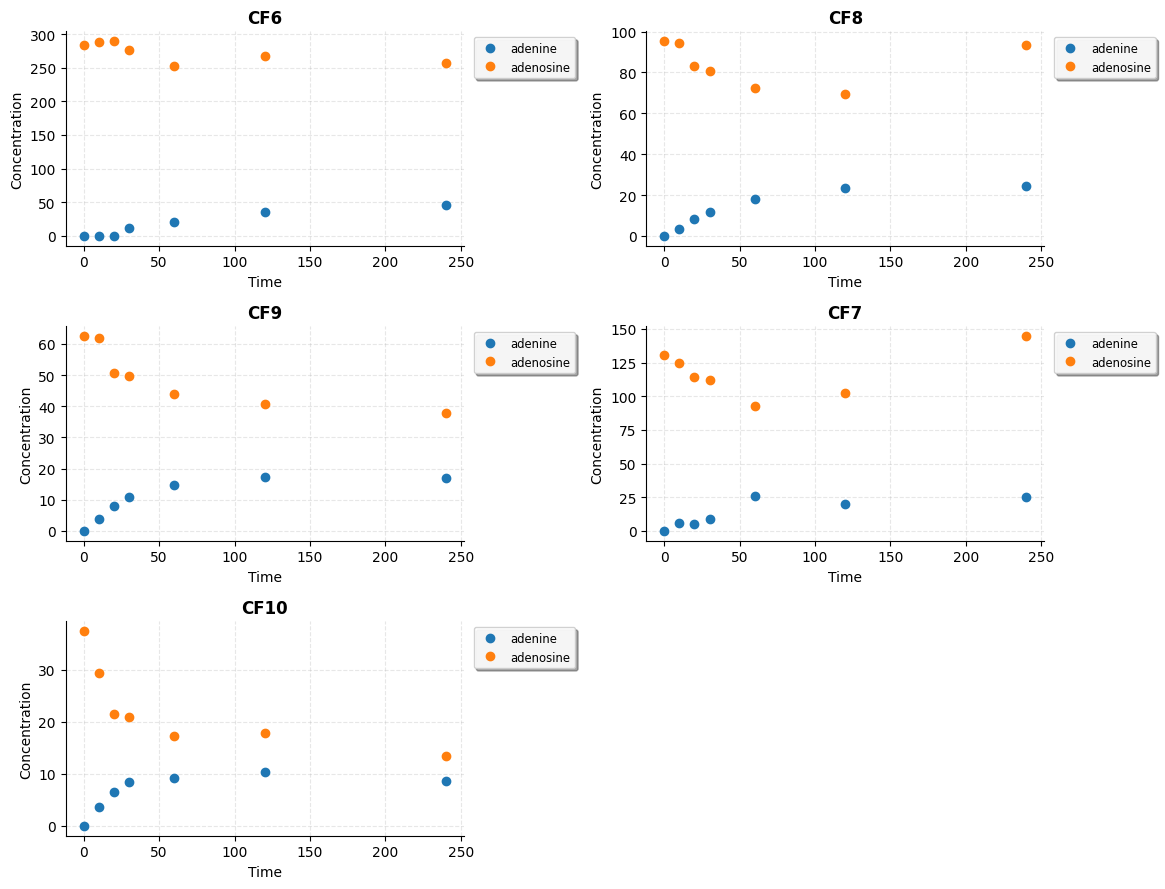

In [5]:
import pyenzyme as pe

fig, ax = pe.plot(enzmldoc)

In [6]:
pe.write_enzymeml(enzmldoc, "data/enzymeml.json")

EnzymeML document written to data/enzymeml.json